#Carga de librerias

In [3]:
#!pip install requests    #Hacer llamadas http a paginas de la red
#!pip install tsplib95    #Modulo para las instancias del problema del TSP

!pip install requests                     
!pip install tabulate>=0.9 networkx>=3.0  
                                          
                                          
!pip install tsplib95 --no-deps           

#Carga de los datos del problema

In [8]:
import urllib.request  # Hacer llamadas HTTP a páginas de la red
import tsplib95        # Módulo para las instancias del problema del TSP
import math            # Funciones matemáticas (se usa para exp)
import random          # Para generar valores aleatorios
import gzip
import shutil

# Descargar el fichero de datos (Matriz de distancias)
file = "swiss42.tsp"
urllib.request.urlretrieve("http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/swiss42.tsp.gz", file + '.gz')

# **ELIMINAR ESTA LÍNEA QUE GENERA ERROR**
# !gzip -d swiss42.tsp.gz  

# Descomprimir usando gzip en Python
input_file = "swiss42.tsp.gz"
output_file = "swiss42.tsp"

with gzip.open(input_file, 'rb') as f_in:
    with open(output_file, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

print("Archivo descomprimido correctamente.")


Archivo descomprimido correctamente.


In [9]:
#Carga de datos y generación de objeto problem
###############################################################################
problem = tsplib95.load(file)

#Nodos
Nodos = list(problem.get_nodes())

#Aristas
Aristas = list(problem.get_edges())



In [10]:
Aristas
# https://github.com/ryanjoneil/tsplib/blob/master/elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/swiss42.tsp

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 18),
 (0, 19),
 (0, 20),
 (0, 21),
 (0, 22),
 (0, 23),
 (0, 24),
 (0, 25),
 (0, 26),
 (0, 27),
 (0, 28),
 (0, 29),
 (0, 30),
 (0, 31),
 (0, 32),
 (0, 33),
 (0, 34),
 (0, 35),
 (0, 36),
 (0, 37),
 (0, 38),
 (0, 39),
 (0, 40),
 (0, 41),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (1, 11),
 (1, 12),
 (1, 13),
 (1, 14),
 (1, 15),
 (1, 16),
 (1, 17),
 (1, 18),
 (1, 19),
 (1, 20),
 (1, 21),
 (1, 22),
 (1, 23),
 (1, 24),
 (1, 25),
 (1, 26),
 (1, 27),
 (1, 28),
 (1, 29),
 (1, 30),
 (1, 31),
 (1, 32),
 (1, 33),
 (1, 34),
 (1, 35),
 (1, 36),
 (1, 37),
 (1, 38),
 (1, 39),
 (1, 40),
 (1, 41),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 10),
 (2, 11),
 (2, 12),
 (2, 13),
 (2, 14),
 (2, 15),
 (2, 16),
 (2, 17),
 (2, 18),



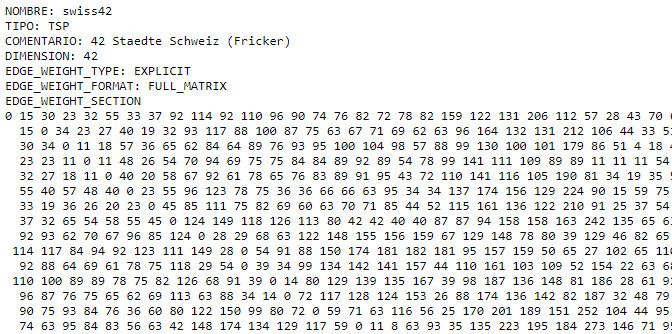

In [26]:
#Probamos algunas funciones del objeto problem

#Distancia entre nodos
problem.get_weight(1,2)

#Todas las funciones
#Documentación: https://tsplib95.readthedocs.io/en/v0.6.1/modules.html

#dir(problem)

34

#Funcionas basicas


In [ ]:

#Funcionas basicas
###############################################################################

#Se genera una solucion aleatoria con comienzo en en el nodo 0
def crear_solucion(Nodos):
  solucion = [Nodos[0]]
  for n in Nodos[1:]:
    solucion = solucion + [random.choice(list(set(Nodos) - set({Nodos[0]}) - set(solucion)))]
  return solucion

#Devuelve la distancia entre dos nodos
def distancia(a,b, problem):
  return problem.get_weight(a,b)

#Devuelve la distancia total de una trayectoria/solucion
def distancia_total(solucion, ):
  distancia_total = 0
  for i in range(len(solucion)-1):
    distancia_total += distancia(solucion[i] ,solucion[i+1] ,  problem)
  return distancia_total + distancia(solucion[len(solucion)-1] ,solucion[0], problem)

sol_temporal = crear_solucion(Nodos)


print(sol_temporal   )
print(distancia_total(sol_temporal, problem))

[0, 20, 31, 41, 40, 24, 30, 19, 28, 34, 12, 21, 36, 38, 29, 11, 6, 32, 39, 1, 27, 10, 33, 5, 26, 13, 8, 25, 16, 4, 35, 18, 3, 37, 2, 22, 7, 14, 9, 23, 17, 15]
4667


#BUSQUEDA ALEATORIA

In [13]:
###############################################################################
# BUSQUEDA ALEATORIA
###############################################################################

def busqueda_aleatoria(problem, N):
  #N es el numero de iteraciones
  Nodos = list(problem.get_nodes())

  mejor_solucion = []
  #mejor_distancia = 10e100                         #Inicializamos con un valor alto
  mejor_distancia = float('inf')                    #Inicializamos con un valor alto

  for i in range(N):                                #Criterio de parada: repetir N veces pero podemos incluir otros
    solucion = crear_solucion(Nodos)                #Genera una solucion aleatoria
    distancia = distancia_total(solucion, problem)  #Calcula el valor objetivo(distancia total)

    if distancia < mejor_distancia:                 #Compara con la mejor obtenida hasta ahora
      mejor_solucion = solucion
      mejor_distancia = distancia


  print("Mejor solución:" , mejor_solucion)
  print("Distancia     :" , mejor_distancia)
  return mejor_solucion


#Busqueda aleatoria con 5000 iteraciones
solucion = busqueda_aleatoria(problem, 50000)

Mejor solución: [0, 31, 37, 1, 27, 22, 8, 40, 21, 29, 28, 12, 33, 34, 2, 24, 41, 6, 13, 16, 7, 19, 17, 36, 20, 14, 30, 32, 15, 26, 11, 10, 5, 18, 3, 4, 35, 39, 38, 9, 25, 23]
Distancia     : 3551


#BUSQUEDA LOCAL

In [ ]:
###############################################################################
# BUSQUEDA LOCAL(1 paso)
###############################################################################
def genera_vecina(solucion):
  #Generador de soluciones vecinas: 2-opt (intercambiar 2 nodos) Si hay N nodos se generan (N-1)x(N-2)/2 soluciones
  #Se puede modificar para aplicar otros generadores distintos que 2-opt
  #print(solucion)
  mejor_solucion = []
  mejor_distancia = 10e100
  for i in range(1,len(solucion)-1):          #Recorremos todos los nodos en bucle doble para evaluar todos los intercambios 2-opt
    for j in range(i+1, len(solucion)):

      #Se genera una nueva solución intercambiando los dos nodos i,j:
      #  (usamos el operador + que para listas en python las concatena) : ej.: [1,2] + [3] = [1,2,3]
      vecina = solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]

      #Se evalua la nueva solución ...
      distancia_vecina = distancia_total(vecina, problem)

      #... para guardarla si mejora las anterioraes
      if distancia_vecina <= mejor_distancia:
        mejor_distancia = distancia_vecina
        mejor_solucion = vecina
  return mejor_solucion


#solucion = [1, 47, 13, 41, 40, 19, 42, 44, 37, 5, 22, 28, 3, 2, 29, 21, 50, 34, 30, 9, 16, 11, 38, 49, 10, 39, 33, 45, 15, 24, 43, 26, 31, 36, 35, 20, 8, 7, 23, 48, 27, 12, 17, 4, 18, 25, 14, 6, 51, 46, 32]
print("Distancia Solucion Incial:" , distancia_total(solucion, problem))


nueva_solucion = genera_vecina(solucion)
print("Distancia Mejor Solucion Local:", distancia_total(nueva_solucion, problem))


Distancia Solucion Incial: 3551
Distancia Mejor Solucion Local: 3313


In [ ]:
#Busqueda Local(iteraciones):
#  - Sobre el operador de vecindad 2-opt(funcion genera_vecina)
#  - Sin criterio de parada, se para cuando no es posible mejorar.
def busqueda_local(solucion, problem):
  mejor_solucion = []

  #Generar una solucion inicial de referencia(aleatoria)
  #solucion_referencia = crear_solucion(Nodos)
  solucion_referencia = solucion
  mejor_distancia = distancia_total(solucion_referencia, problem)

  iteracion=0             #Un contador para saber las iteraciones que hacemos
  while(1):
    iteracion +=1         #Incrementamos el contador
    #print('#',iteracion)

    #Obtenemos la mejor vecina ...
    vecina = genera_vecina(solucion_referencia)

    #... y la evaluamos para ver si mejoramos respecto a lo encontrado hasta el momento
    distancia_vecina = distancia_total(vecina, problem)

    #Si no mejoramos hay que terminar. Hemos llegado a un minimo local(según nuestro operador de vencindad 2-opt)
    if distancia_vecina < mejor_distancia:
      #mejor_solucion = copy.deepcopy(vecina)   #Con copia profunda. Las copias en python son por referencia
      mejor_solucion = vecina                   #Guarda la mejor solución encontrada
      mejor_distancia = distancia_vecina

    else:
      print("En la iteracion ", iteracion, ", la mejor solución encontrada es:" , mejor_solucion)
      print("Distancia     :" , mejor_distancia)
      return mejor_solucion

    solucion_referencia = vecina


sol = busqueda_local(nueva_solucion, problem )

En la iteracion  35 , la mejor solución encontrada es: [0, 1, 3, 27, 29, 21, 40, 24, 22, 38, 34, 33, 20, 32, 30, 28, 2, 13, 19, 14, 16, 15, 37, 36, 35, 31, 17, 7, 18, 12, 11, 26, 5, 6, 4, 8, 9, 39, 23, 41, 25, 10]
Distancia     : 1723


#SIMULATED ANNEALING


In [16]:
###############################################################################
# SIMULATED ANNEALING
###############################################################################

#Generador de 1 solucion vecina 2-opt 100% aleatoria (intercambiar 2 nodos)
#Mejorable eligiendo otra forma de elegir una vecina.
def genera_vecina_aleatorio(solucion):

  #Se eligen dos nodos aleatoriamente
  i,j = sorted(random.sample( range(1,len(solucion)) , 2))

  #Devuelve una nueva solución pero intercambiando los dos nodos elegidos al azar
  return solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]


#Funcion de probabilidad para aceptar peores soluciones
def probabilidad(T,d):
  if random.random() <  math.exp( -1*d / T)  :
    return True
  else:
    return False

#Funcion de descenso de temperatura
def bajar_temperatura(T):
  return T*0.99

In [17]:
def recocido_simulado(problem, TEMPERATURA ):
  #problem = datos del problema
  #T = Temperatura

  solucion_referencia = crear_solucion(Nodos)
  distancia_referencia = distancia_total(solucion_referencia, problem)

  mejor_solucion = []             #x* del seudocodigo
  mejor_distancia = 10e100        #F* del seudocodigo


  N=0
  while TEMPERATURA > .0001:
    N+=1
    #Genera una solución vecina
    vecina =genera_vecina_aleatorio(solucion_referencia)

    #Calcula su valor(distancia)
    distancia_vecina = distancia_total(vecina, problem)

    #Si es la mejor solución de todas se guarda(siempre!!!)
    if distancia_vecina < mejor_distancia:
        mejor_solucion = vecina
        mejor_distancia = distancia_vecina

    #Si la nueva vecina es mejor se cambia
    #Si es peor se cambia según una probabilidad que depende de T y delta(distancia_referencia - distancia_vecina)
    if distancia_vecina < distancia_referencia or probabilidad(TEMPERATURA, abs(distancia_referencia - distancia_vecina) ) :
      #solucion_referencia = copy.deepcopy(vecina)
      solucion_referencia = vecina
      distancia_referencia = distancia_vecina

    #Bajamos la temperatura
    TEMPERATURA = bajar_temperatura(TEMPERATURA)

  print("La mejor solución encontrada es " , end="")
  print(mejor_solucion)
  print("con una distancia total de " , end="")
  print(mejor_distancia)
  return mejor_solucion

sol  = recocido_simulado(problem, 10000000)

La mejor solución encontrada es [0, 6, 5, 26, 34, 20, 33, 35, 36, 1, 27, 2, 18, 10, 11, 25, 41, 23, 21, 40, 24, 39, 38, 22, 32, 3, 4, 28, 30, 29, 9, 8, 12, 13, 19, 16, 14, 17, 31, 37, 15, 7]
con una distancia total de 1855


#Representación en un grafo a partir de la matriz de distancias( Optimización de posiciones usando escalado multidimensional (MDS)



Multidimensional scaling problem(MDS):   https://en.wikipedia.org/wiki/Multidimensional_scaling

In [41]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.manifold import MDS  # Multidimensional Scaling o Escalado Multidimensional

def plot_tsp_solution(distance_matrix, tsp_solution):
    """
    Dibuja el grafo de un TSP con las posiciones calculadas mediante MDS y muestra
    solo las aristas correspondientes a la solución del TSP.

    :param distance_matrix: np.ndarray, matriz de distancias entre nodos
    :param tsp_solution: list, lista de nodos en el orden de la solución del TSP
    """
    # Crear el grafo completo
    G = nx.Graph()
    num_nodes = len(distance_matrix)
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            G.add_edge(i, j, weight=distance_matrix[i][j])

    # Usar MDS para calcular posiciones de los nodos
    mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
    positions = mds.fit_transform(distance_matrix)

    # Convertir las posiciones en un diccionario para networkx
    pos = {i: positions[i] for i in range(num_nodes)}

    # Crear un subgrafo con las aristas del camino TSP
    TSP_G = nx.Graph()
    for i in range(len(tsp_solution) - 1):
        u = tsp_solution[i]
        v = tsp_solution[i + 1]
        TSP_G.add_edge(u, v, weight=distance_matrix[u][v])

    # Dibujar el grafo
    plt.figure(figsize=(8, 6))

    # Dibujar nodos
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)

    # Dibujar las aristas del camino TSP
    nx.draw_networkx_edges(TSP_G, pos, edge_color='red', width=2)

    # Añadir etiquetas a los nodos y pesos de las aristas
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
    edge_labels = nx.get_edge_attributes(TSP_G, 'weight')
    nx.draw_networkx_edge_labels(TSP_G, pos, edge_labels=edge_labels, font_size=8)

    plt.title("Grafo TSP con solución específica")
    plt.show()


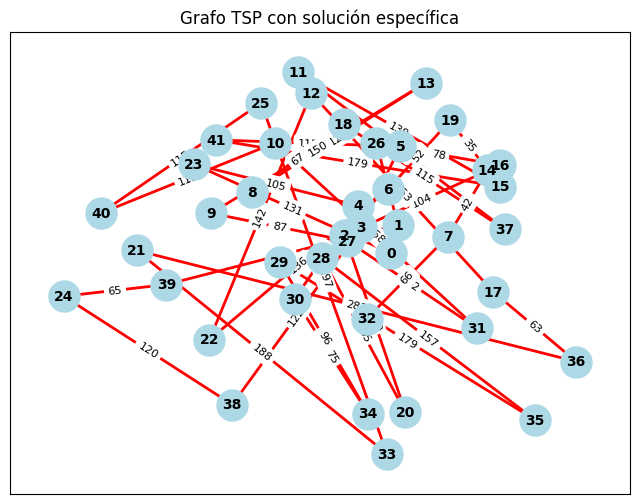

In [42]:
plot_tsp_solution(problem.edge_weights, crear_solucion(Nodos))

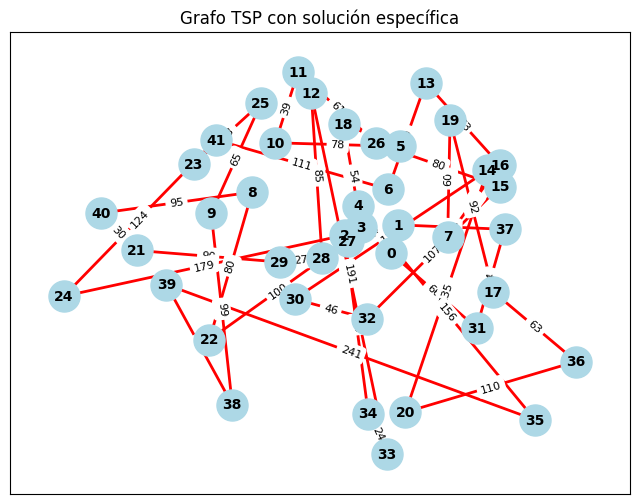

In [43]:
plot_tsp_solution(problem.edge_weights, solucion)

---

## Busqueda local con entornos variables (Punto Extra 1)

In [45]:
import random

# Definir la función genera_vecina_vns
def genera_vecina_vns(solucion, tipo_vecindad):
    solucion = solucion[:]  # Copia para evitar modificar la original
    if tipo_vecindad == 1:  # Swap (intercambio de dos nodos)
        i, j = sorted(random.sample(range(1, len(solucion)), 2))
        solucion[i], solucion[j] = solucion[j], solucion[i]
    
    elif tipo_vecindad == 2:  # 2-opt (invertir una subruta)
        i, j = sorted(random.sample(range(1, len(solucion)), 2))
        solucion[i:j] = solucion[i:j][::-1]
    
    elif tipo_vecindad == 3:  # 3-opt (intercambio de tres nodos)
        i, j, k = sorted(random.sample(range(1, len(solucion)), 3))
        solucion = solucion[:i] + solucion[j:k] + solucion[i:j] + solucion[k:]

    elif tipo_vecindad == 4:  # Insertion (mover un nodo a otra posición)
        i, j = sorted(random.sample(range(1, len(solucion)), 2))
        nodo = solucion.pop(i)
        solucion.insert(j, nodo)

    return solucion

# Definir la función de distancia total
def distancia_total(solucion, problem):
    distancia_total = 0
    for i in range(len(solucion) - 1):
        distancia_total += problem.get_weight(solucion[i], solucion[i + 1])
    distancia_total += problem.get_weight(solucion[-1], solucion[0])  # Regreso al inicio
    return distancia_total

# Definir la función de búsqueda local VNS
def busqueda_local_vns(solucion, problem):
    mejor_solucion = solucion[:]
    mejor_distancia = distancia_total(solucion, problem)
    tipo_vecindad = 1  # Empezamos con la primera vecindad

    iteracion = 0
    while tipo_vecindad <= 4:  # Usamos 4 tipos de vecindades
        iteracion += 1
        vecina = genera_vecina_vns(mejor_solucion, tipo_vecindad)
        distancia_vecina = distancia_total(vecina, problem)

        if distancia_vecina < mejor_distancia:
            mejor_solucion = vecina[:]
            mejor_distancia = distancia_vecina
            tipo_vecindad = 1  # Reiniciamos la vecindad si mejoramos
        else:
            tipo_vecindad += 1  # Pasamos a la siguiente vecindad

    print(f"Iteraciones: {iteracion}")
    print("Mejor solución encontrada:", mejor_solucion)
    print("Distancia:", mejor_distancia)
    return mejor_solucion

# Ejecutar la búsqueda local con entornos variables
# Primero, necesito una solución inicial aleatoria
problem = tsplib95.load("swiss42.tsp")  # Cargar el problema (ajustar si es necesario)
Nodos = list(problem.get_nodes())
solucion_inicial = random.sample(Nodos, len(Nodos))  # Generar una solución inicial aleatoria

# Ejecutar el algoritmo de búsqueda local con VNS
solucion_optima = busqueda_local_vns(solucion_inicial, problem)


Iteraciones: 5
Mejor solución encontrada: [8, 29, 18, 21, 24, 36, 41, 34, 33, 39, 28, 6, 11, 3, 0, 12, 40, 31, 26, 13, 17, 9, 22, 27, 5, 1, 19, 7, 30, 2, 35, 37, 16, 10, 15, 20, 32, 14, 4, 23, 38, 25]
Distancia: 4443


## 🔹 **Pasos del código**
1. **Generar soluciones vecinas** con diferentes operadores:
   - **Swap:** Intercambia dos nodos.
   - **2-opt:** Invierte una subruta.
   - **3-opt:** Intercambia tres nodos.
   - **Insertion:** Mueve un nodo a otra posición.

2. **Calcular la distancia total de la solución.**

3. **Ejecutar la Búsqueda Local con VNS:**
   - Comienza con una solución inicial aleatoria.
   - Intenta mejorarla con diferentes operadores.
   - Si encuentra una mejor solución, vuelve al primer operador.
   - Si no mejora, cambia al siguiente operador.
   - Se detiene cuando no hay más mejoras posibles.



## Mejorar función genera_vecina_aleatorio() de Simulate Annealing (Punto Extra 2)

In [46]:
import math

# Definir la función de Simulated Annealing con la mejora de vecindades
def simulated_annealing(solucion, problem, T=1000, cooling_rate=0.99):
    mejor_solucion = solucion[:]
    mejor_distancia = distancia_total(solucion, problem)
    
    while T > 1:
        # Elegir un tipo de vecindad aleatoria
        tipo_vecindad = random.choice([1, 2, 3, 4])
        nueva_solucion = genera_vecina_vns(mejor_solucion, tipo_vecindad)
        nueva_distancia = distancia_total(nueva_solucion, problem)
        
        # Aceptar la nueva solución si es mejor o con una probabilidad basada en la temperatura
        if nueva_distancia < mejor_distancia or random.random() < math.exp((mejor_distancia - nueva_distancia) / T):
            mejor_solucion = nueva_solucion[:]
            mejor_distancia = nueva_distancia
        
        # Reducir la temperatura
        T *= cooling_rate

    return mejor_solucion, mejor_distancia

# Generar una solución inicial aleatoria para el caso de uso
solucion_inicial = random.sample(Nodos, len(Nodos))

# Ejecutar Simulated Annealing
solucion_sa, distancia_sa = simulated_annealing(solucion_inicial, problem)

# Mostrar resultados
print("\n🔹 Resultado de Simulated Annealing 🔹")
print("Mejor solución encontrada:", solucion_sa)
print("Distancia óptima encontrada:", distancia_sa)



🔹 Resultado de Simulated Annealing 🔹
Mejor solución encontrada: [24, 40, 23, 25, 26, 19, 13, 18, 4, 5, 7, 37, 10, 11, 12, 41, 2, 27, 31, 17, 35, 36, 15, 14, 16, 6, 8, 28, 30, 32, 34, 33, 20, 38, 3, 1, 0, 29, 21, 39, 9, 22]
Distancia óptima encontrada: 2293


🔹 Pasos del código (Simulated Annealing - Recocido Simulado)
Generar soluciones vecinas con diferentes operadores aleatorios:

Swap: Intercambia dos nodos.
2-opt: Invierte una subruta.
3-opt: Intercambia tres nodos.
Insertion: Mueve un nodo a otra posición.
Calcular la distancia total de la solución.

Ejecutar el Recocido Simulado (Simulated Annealing):

Comienza con una solución inicial aleatoria.
En cada iteración, genera una nueva solución vecina.
Si la nueva solución es mejor, la acepta.
Si es peor, la acepta con cierta probabilidad que depende de la temperatura.
La temperatura disminuye en cada iteración, reduciendo la probabilidad de aceptar soluciones peores.
Se detiene cuando la temperatura es muy baja.

🚀 Objetivo: Explorar mejor el espacio de búsqueda y evitar quedar atrapado en mínimos locales.







